# Week 6: Logistic Regression and Discriminant Analysis

This week, we cover **logistic regression**, one of the most popular classifiers. Like the other classifiers we have seen, it computes posterior probabilities without assuming the distributions of the classes.

Secondly, we will consider **discriminant analysis**, a powerful family of classifiers that construct so-called **discriminant functions** that specify decision boundaries that determine how points are assigned to classes.

Unlike previously-seen classifiers, these methods do not necessarily require assuming the distribution of the classes.

# Lecture 10: Logistic Regression

In class, we discussed the logistic regression model for both binary classification and multiclass classification.

## Binary Logistic Regression

In this case, we predict binary labels $Y\in\{0, 1\}$. Fitting the model simplifies to minimizing the **binary cross-entropy** loss function

$$L(\theta)=-\sum\limits_{i=1}^n y_i\ln\left(\sigma\left(\theta^Tx_i\right)\right)+(1-y_i)\ln\left(\sigma\left(-\theta^Tx_i\right)\right)$$

where $\theta=(\theta_0, \theta_1, ..., \theta_d)^T$ are parameters of the model and $\sigma:\mathbb{R}\to\mathbb{R}$ is the **logistic** or **sigmoid** function

$$\sigma(z)=\frac{1}{1+e^{-z}}=\frac{e^z}{1+e^z}$$

In class, we showed

$$\frac{\partial L}{\partial\theta}=\sum\limits_{i=1}^n\left(\sigma\left(\theta^Tx\right)-y_i\right)x_i$$

To code logistic regression, let's first import some libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

Next, we implement binary logistic regression.

In [2]:
class BinaryLogisticRegression:        
    def fit(self, X, y, alpha, epochs, eps, update):
        # add a column of 1s to X
        X = np.hstack((np.ones([X.shape[0],1]), X))
            
        # modify y to be n by 1
        y = np.atleast_2d(y).T
        
        # initialize the parameters to 1
        self.theta = np.ones([X.shape[1], 1])
        
        # initialize the step number and theta gradient
        step = 0
        thetagrad = 2 * eps
        
        # minimize cross-entropy -- run until thetagrad is small or step is epochs
        while np.linalg.norm(thetagrad) > eps and step < epochs:
            # compute the loss
            sig = self.sigmoid(X @ self.theta)
            
            if step % update == 0:
                loss = -(1/X.shape[0]) * np.sum(y * np.log(sig + 0.001) + (1 - y) * np.log(1 - sig + 0.001))
                print('Iteration', step, '\tLoss =', loss)
            
            # compute the gradient
            thetagrad = X.T @ (sig - y)
            
            # take a gradient descent step
            self.theta -= alpha * thetagrad
                        
            # iterate the step
            step += 1
            
            if step == epochs:
                print('Gradient descent failed to converge. (The answer may still be acceptably good.)')
            
    def predict(self, X):
        # add a column of 1s to X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # return 0 if the posterior for Y=1 is less than for Y=0
        # otherwise, return 1
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(float)
            
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

### Example: Detecting Breast Cancer with Binary Logistic Regression

Iteration 0 	Loss = 2.7560153177035067


C:\Users\Ryan\AppData\Local\Temp/ipykernel_2720/4107300181.py:46: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration 100000 	Loss = 0.3882261210367881
Iteration 200000 	Loss = 0.6477098686167024
Iteration 300000 	Loss = 0.53418572905049
Iteration 400000 	Loss = 0.30713744991806485
Iteration 500000 	Loss = 0.27470198147057556
Iteration 600000 	Loss = 0.33957291836555414
Iteration 700000 	Loss = 0.27470198147057556
Iteration 800000 	Loss = 0.30713744991806485
Iteration 900000 	Loss = 0.2584842472468309
Gradient descent failed to converge. (The answer may still be acceptably good.)

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.90      0.86        42
           1       0.96      0.92      0.94       101

    accuracy                           0.92       143
   macro avg       0.89      0.91      0.90       143
weighted avg       0.92      0.92      0.92       143


Confusion Matrix:



<AxesSubplot:>

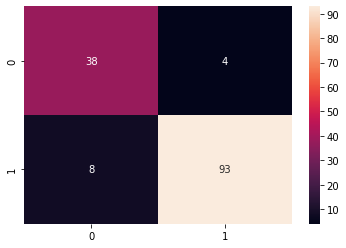

In [3]:
# import the breast cancer dataset
breastcancer = datasets.load_breast_cancer()

# find the data and labels
X = breastcancer.data
Y = breastcancer.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the classifier
model = BinaryLogisticRegression()

# fit the classifier to the training data
model.fit(trainX, trainY, alpha = 0.01, epochs = 1000000, eps = 0.01, update = 100000)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

### Example: Detecting Breast Cancer with `LogisticRegression` from `scikit-learn`

The built-in `LogisticRegression` class in `scikit-learn` tends to work a little faster because it uses an optimizer that efficiently uses second derivative information by default. Note that the class uses an $L^2$ penalty if we speciy the variable `C`, where

$$C=\frac{1}{\lambda_2}$$

Tuning this hyperparameter is a good idea to improve performance on the test set.

In [4]:
# import the breast cancer dataset
breastcancer = datasets.load_breast_cancer()

# find the data and labels
X = breastcancer.data
Y = breastcancer.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the classifier
model = LogisticRegression(C = 10000, max_iter = 10000)

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))


Training Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.96      0.98       164
           1       0.98      0.99      0.98       262

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93        48
           1       0.98      0.95      0.96        95

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



## Multiclass Logistic Regression

Logistic regression can also be applied to classification problems with logistic regression. In this case, we predict one-hot vector labels $Y\in\{\mathbf{e}_1, \mathbf{e}_2, ..., \mathbf{e}_k\}$. Fitting the model simplifies to minimizing the **categorical cross-entropy** loss function

$$L(\theta)=-\sum\limits_{i=1}^n\sum\limits_{j=1}^k y_{ij}\ln\left(\sigma\left(\theta^T_j x_i\right)\right)$$

where $\theta_j=(\theta_{j0}, \theta_{j1}, ..., \theta_{jd})^T$ are parameters of the model for $j=1, ..., k$.

In class, we derived the gradient, which can be used in gradient descent as

$$\frac{\partial L}{\partial\theta_l}=\sum\limits_{i=1}^n \left(\pi_l(x_i) - y_{il}\right)x_i=\sum\limits_{i=1}^n\sum\limits_{j=1}^k \left(\sigma\left(\theta^T x_i\right)_l-y_{il}\right)x_i$$

where the **softmax** function $\sigma:\mathbb{R}^k\to\mathbb{R}^k$ is defined in each coordinate as

$$\sigma(z)_i=\frac{e^{z_i}}{\sum\limits_{j=1}^k e^{z_j}}$$

We will simply use the `scikit-learn` class `LogisticRegression` for the multiclass case to avoid some not-so-enlightening code (at least, given that it's just scaling up the binary case).

### Example: Classifying the Iris Dataset with Logistic Regression


Predicted class labels:
 [1 0 2 0 2 0 2 2 1 1 1 2 2 0 2 2 1 1 1 1 0 1 2 1 1 0 2 0 1 1 2 1 2 0 1 0 2
 0]

True class labels:
 [1 0 2 0 2 0 2 2 1 1 1 2 2 0 2 2 2 1 1 1 0 1 2 1 2 0 2 0 1 1 2 1 2 0 1 0 1
 0]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.87      0.93      0.90        14
           2       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38


Confusion Matrix:



<AxesSubplot:>

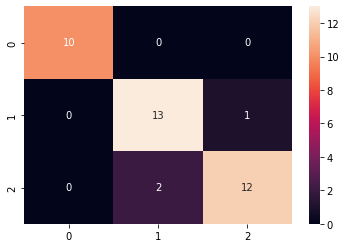

In [5]:
iris = datasets.load_iris()

# find the data and labels
X = iris.data
Y = iris.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the logistic regression classifier
model = LogisticRegression(max_iter = 10000)

# fit the logistic regression classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print predicted and true class labels
print('\nPredicted class labels:\n', predictedY)
print('\nTrue class labels:\n', testY)

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

### Example MNIST Handwritten Digits with Logistic Regression


Training Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      5923
           1       0.96      0.98      0.97      6742
           2       0.94      0.92      0.93      5958
           3       0.92      0.91      0.92      6131
           4       0.94      0.95      0.94      5842
           5       0.91      0.91      0.91      5421
           6       0.96      0.97      0.96      5918
           7       0.95      0.95      0.95      6265
           8       0.91      0.90      0.91      5851
           9       0.92      0.92      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
         

<AxesSubplot:>

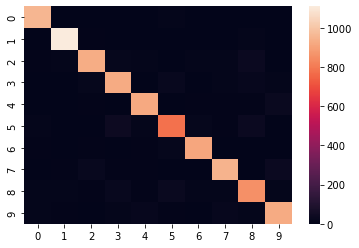

In [6]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# flatten the data to 768-vectors and normalize
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

# build the classifier
model = LogisticRegression(max_iter = 10000, njobs = -1)

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))

We see 93% accuracy on the test set with zero hyperparameter tuning!

# Lecture 11: Discriminant Analysis

Today, we will apply some of the theory from class to use linear discriminant analysis (and quadratic discriminant analysis) on some real classification problems. Let's import some libraries first.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import time

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10

### (Fisher's) LDA Class

(Writing a class for Fisher's LDA will be a problem on Homework 3)

### LDA Class

In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

class DA(ClassifierMixin, BaseEstimator):
    def __init__(self, equalCovariances = True, alpha = 1, gamma = 1):
        # if True, LDA
        # if False, QDA
        self.equalCovariances = equalCovariances
        
        # if less than 1, regularized DA (requires QDA)
        self.alpha = alpha
        
        # if less than 1, shrinkage
        self.gamma = gamma
        
    def fit(self, X, Y):
        # find the unique labels
        uniqueY = np.unique(Y)
        
        # find the dimensions
        n = X.shape[0]
        self.d = X.shape[1]
        self.k = uniqueY.shape[0]

        # initialize the variables
        self.prior = np.zeros([self.k, 1])
        self.mu = np.zeros([self.k, 1, self.d])
        
        # compute the covariance matrix
        if self.equalCovariances or self.gamma < 1 or self.alpha < 1:
            mu = np.mean(X, axis = 0)
            Xbar = X - mu
            self.Sig = (1/n) * Xbar.T @ Xbar
            
            # shrinkage
            if self.gamma < 1:
                self.Sig = self.gamma * self.Sig + (1 - self.gamma) * np.diag(self.Sig)
                
            self.invCov = np.linalg.inv(self.Sig)
        
        if not self.equalCovariances:
            self.Sigma = np.zeros([self.k, self.d, self.d])            
        
        for i, y in enumerate(uniqueY):
            # extract a class of datapoints from X
            Xi = X[Y == y]
            
            # compute the size of each class
            ni = Xi.shape[0]
            
            # compute the priors
            self.prior[i] = ni / n
                        
            # compute the feature means within the class
            self.mu[i] = np.mean(Xi, axis = 0)
            
            # compute separate covariances for QDA
            if not self.equalCovariances:
                # compute the centered data
                XiBar = Xi - self.mu[i]
            
                # compute the class sample covariance
                self.Sigma[i] = (1/ni) * XiBar.T @ XiBar
                
                # regularization
                if self.alpha < 1:
                    self.Sigma[i] = self.alpha * self.Sigma[i] + (1 - self.alpha) * self.Sig
                
        
    def predict(self, X):
        n = X.shape[0]
        
        discriminants = np.zeros([n, self.k])
        
        for i, x in enumerate(X):
            x = np.atleast_2d(x).T
            
            for j in range(self.k):
                if not self.equalCovariances:
                    self.invCov = np.linalg.inv(self.Sigma[j])

                discriminants[i][j] = x.T @ self.invCov @ self.mu[j].T - (1/2) * self.mu[j] @ self.invCov @ self.mu[j].T + np.log(self.prior[j])

            
        predictions = np.argmax(discriminants, axis = 1)
        
        return predictions
    
    def score(self, X, y, sample_weight = None):
        return accuracy_score(y, self.predict(X), sample_weight = sample_weight)

### Example: Randomly Generated Points

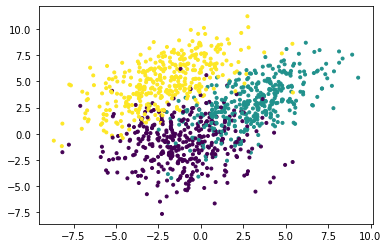

In [4]:
# number of points to generate
numberOfPoints = 500

# generate points from class 0
mean1 = np.array([-1, -1])
covariance1 = np.array([[5, 0], [0, 5]])
X1 = np.random.multivariate_normal(mean1, covariance1, numberOfPoints)

# generate points from class 1
mean2 = np.array([3, 3])
covariance2 = np.array([[5, 3], [3, 5]])
X2 = np.random.multivariate_normal(mean2, covariance2, numberOfPoints)

# generate points from class 2
mean3 = np.array([-2, 5])
covariance3 = np.array([[5, 3], [3, 5]])
X3 = np.random.multivariate_normal(mean3, covariance3, numberOfPoints)

# stack the points
X = np.vstack((X1, X2, X3))

# create a vector of the labels
Y = np.hstack((numberOfPoints * [0], numberOfPoints * [1], numberOfPoints * [2]))

# randomly choose 75% of the data to be the training set and 25% for the testing set
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state = 1)

# plot the training set
plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

#### Using Our DA method...


Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.86      0.83       120
           1       0.89      0.82      0.85       127
           2       0.91      0.91      0.91       128

    accuracy                           0.86       375
   macro avg       0.86      0.86      0.86       375
weighted avg       0.87      0.86      0.86       375


Confusion Matrix:



<AxesSubplot:>

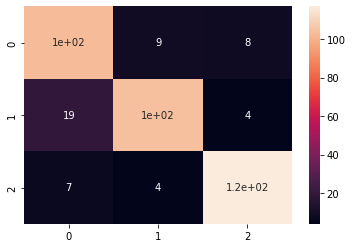

In [10]:
# fit the model to the training data
model = DA()
model.fit(trainX,trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

Let's try with QDA.


Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.84      0.83       120
           1       0.90      0.80      0.85       127
           2       0.87      0.95      0.91       128

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375


Confusion Matrix:



<AxesSubplot:>

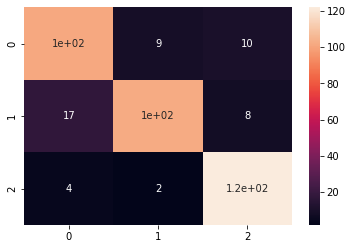

In [11]:
# fit the model to the training data
model = DA(equalCovariances = False)
model.fit(trainX,trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

Mean CV accuracy for parameters 0.1 0.1 is 0.8435555555555556
Mean CV accuracy for parameters 0.1 0.2 is 0.8497777777777777
Mean CV accuracy for parameters 0.1 0.3 is 0.8560000000000001
Mean CV accuracy for parameters 0.1 0.4 is 0.863111111111111
Mean CV accuracy for parameters 0.1 0.5 is 0.863111111111111
Mean CV accuracy for parameters 0.1 0.6 is 0.8675555555555554
Mean CV accuracy for parameters 0.1 0.7 is 0.8675555555555554
Mean CV accuracy for parameters 0.1 0.8 is 0.8684444444444445
Mean CV accuracy for parameters 0.1 0.9 is 0.8684444444444444
Mean CV accuracy for parameters 0.1 1.0 is 0.8622222222222222
Mean CV accuracy for parameters 0.2 0.1 is 0.847111111111111
Mean CV accuracy for parameters 0.2 0.2 is 0.8524444444444444
Mean CV accuracy for parameters 0.2 0.3 is 0.8577777777777778
Mean CV accuracy for parameters 0.2 0.4 is 0.8622222222222222
Mean CV accuracy for parameters 0.2 0.5 is 0.8648888888888889
Mean CV accuracy for parameters 0.2 0.6 is 0.8666666666666666
Mean CV acc

<AxesSubplot:>

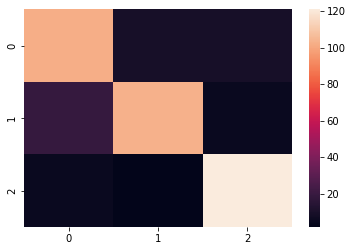

In [12]:
# initialize accuracy and hyperparameter list
bestAccuracy = [0, 0, 0]

# test regularization hyperparameters 0.00, 0.01, ..., 0.19
for i in range(1, 11):
    for j in range(1, 11):
        alpha = i/10
        gamma = j/10

        # build the QDA classifier
        model = DA(False, alpha, gamma)

        # fit the QDA classifier to the training data
        model.fit(trainX, trainY)
        
        # compute the test predictions
        predictedY = model.predict(testX)

        # find the mean cross-validation accuracy
        mean_cv_scores = np.mean(cross_val_score(model, trainX, trainY, cv = 5))

        # print quality metrics
        print('Mean CV accuracy for parameters', alpha, gamma, 'is', mean_cv_scores)

        # save the hyperparameter reg_param if better than found before
        if mean_cv_scores > bestAccuracy[0]:
            bestAccuracy = [mean_cv_scores, alpha, gamma]
        
print('\nThe best dev accuracy', bestAccuracy[0], 'occured with alpha =', bestAccuracy[1], 'and gamma =', bestAccuracy[2])
        
# build the QDA classifier
model = DA(False, bestAccuracy[1], bestAccuracy[2])

# fit the QDA classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report for the best hyperparameters:\n\n', classification_report(testY, predictedY))

print('\nTest Confusion Matrix:\n')
sn.heatmap(confusion_matrix(testY, predictedY))

#### `scikit-learn` Implementations

Now that we fully see how LDA and QDA work, we will rely on the optimized `scikit-learn` implementations of LDA and QDA.


Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.86      0.83       120
           1       0.91      0.81      0.86       127
           2       0.90      0.94      0.92       128

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375


Confusion Matrix:



<AxesSubplot:>

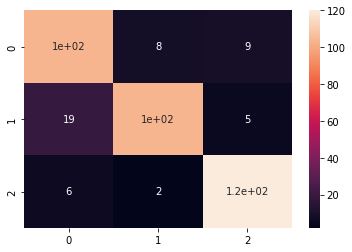

In [13]:
# fit the model to the training data
model = LinearDiscriminantAnalysis()
model.fit(trainX,trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

# print quality metrics
print('\nClassification Report:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

Mean CV accuracy for regularization parameter 0.0 is 0.8684444444444445
Mean CV accuracy for regularization parameter 0.01 is 0.8693333333333333
Mean CV accuracy for regularization parameter 0.02 is 0.8693333333333333
Mean CV accuracy for regularization parameter 0.03 is 0.8693333333333333
Mean CV accuracy for regularization parameter 0.04 is 0.8693333333333333
Mean CV accuracy for regularization parameter 0.05 is 0.8693333333333333
Mean CV accuracy for regularization parameter 0.06 is 0.8693333333333333
Mean CV accuracy for regularization parameter 0.07 is 0.8693333333333333
Mean CV accuracy for regularization parameter 0.08 is 0.8693333333333333
Mean CV accuracy for regularization parameter 0.09 is 0.8693333333333333
Mean CV accuracy for regularization parameter 0.1 is 0.8684444444444445
Mean CV accuracy for regularization parameter 0.11 is 0.8675555555555554
Mean CV accuracy for regularization parameter 0.12 is 0.8675555555555554
Mean CV accuracy for regularization parameter 0.13 is

<AxesSubplot:>

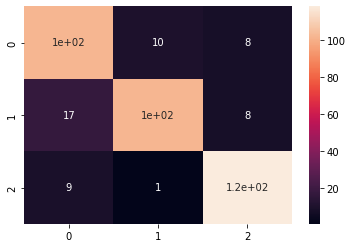

In [14]:
# initialize accuracy and hyperparameter list
bestAccuracy = [0, 0]

# test regularization hyperparameters 0.00, 0.01, ..., 0.20
for i in range(25):
    rp = i/100
    
    # build the QDA classifier
    model = QuadraticDiscriminantAnalysis(reg_param = rp)

    # fit the QDA classifier to the training data
    model.fit(trainX, trainY)
    
    # find the mean cross-validation accuracy
    mean_cv_scores = np.mean(cross_val_score(model, trainX, trainY, cv = 5))

    # print quality metrics
    print('Mean CV accuracy for regularization parameter', rp, 'is', mean_cv_scores)
    
    # save the hyperparameter reg_param if better than found before
    if mean_cv_scores > bestAccuracy[0]:
        bestAccuracy = [mean_cv_scores, rp]
        
print('\nThe best dev accuracy', bestAccuracy[0], 'occured with', bestAccuracy[1], 'regularization parameter')
        
# build the QDA classifier
model = QuadraticDiscriminantAnalysis(reg_param = bestAccuracy[1])

# fit the QDA classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report for', bestAccuracy[0], 'reg_param:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

### Example from scikit-learn: LDA vs QDA

This example is lightly modified from the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py).

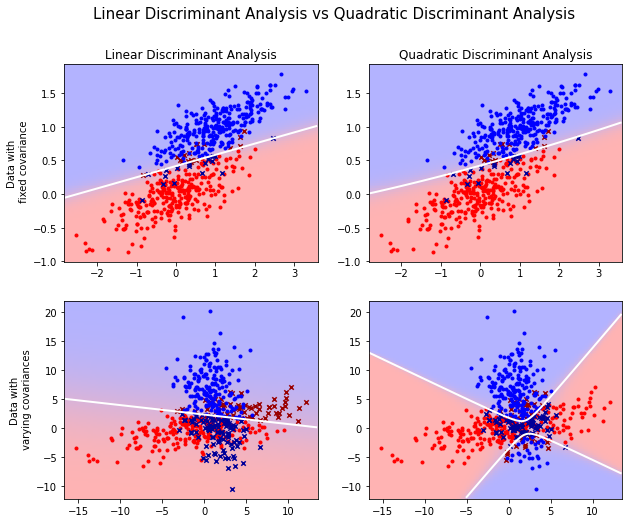

In [15]:
from scipy import linalg
import matplotlib as mpl
from matplotlib import colors

# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

# Generate datasets
def dataset_fixed_cov():
    # Generate 2 Gaussians samples with the same covariance matrix
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C), np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

def dataset_cov():
    # Generate 2 Gaussians samples with different covariance matrices
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C), np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x', s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x', s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 100))
    
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes', norm=colors.Normalize(0., 1.), zorder=0, shading='auto')
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    return splot

plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis', y=0.98, fontsize=15)

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis()
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis()
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)

### Example: Breast Cancer


Test Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.75      0.86        57
           1       0.86      1.00      0.92        86

    accuracy                           0.90       143
   macro avg       0.93      0.88      0.89       143
weighted avg       0.92      0.90      0.90       143


Test Confusion Matrix:



<AxesSubplot:>

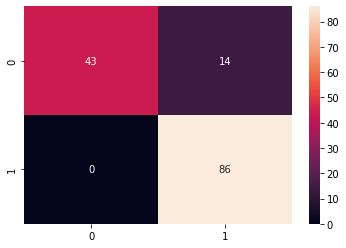

In [17]:
# import the breast cancer dataset
breastcancer = datasets.load_breast_cancer()

# find the data and labels
X = breastcancer.data
Y = breastcancer.target

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25)

# build the classifier
model = DA()

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report:\n\n', classification_report(testY, predictedY))
print('\nTest Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY), annot = True)

### Example: Classifying MNIST Handwritten Digits with LDA and QDA

#### LDA


Training Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.94      0.95      5923
           1       0.87      0.96      0.91      6742
           2       0.92      0.82      0.86      5958
           3       0.86      0.85      0.86      6131
           4       0.86      0.90      0.88      5842
           5       0.83      0.82      0.83      5421
           6       0.93      0.92      0.92      5918
           7       0.92      0.84      0.88      6265
           8       0.81      0.80      0.80      5851
           9       0.78      0.86      0.82      5949

    accuracy                           0.87     60000
   macro avg       0.87      0.87      0.87     60000
weighted avg       0.87      0.87      0.87     60000


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.89      0.97      0.93      1135
         

<AxesSubplot:>

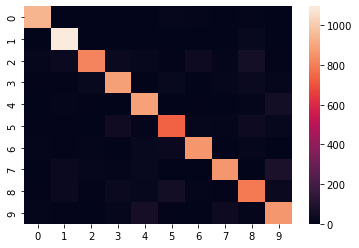

In [18]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

# build the classifier
model = LinearDiscriminantAnalysis()

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))

#### LDA with Ledoit-Wolf shrinkage


Training Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.94      0.95      5923
           1       0.87      0.96      0.91      6742
           2       0.92      0.82      0.87      5958
           3       0.86      0.84      0.85      6131
           4       0.87      0.90      0.88      5842
           5       0.84      0.83      0.83      5421
           6       0.93      0.92      0.93      5918
           7       0.93      0.85      0.89      6265
           8       0.81      0.80      0.81      5851
           9       0.79      0.88      0.83      5949

    accuracy                           0.88     60000
   macro avg       0.88      0.87      0.87     60000
weighted avg       0.88      0.88      0.88     60000


Testing Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.95      0.95       980
           1       0.89      0.96      0.93      1135
         

<AxesSubplot:>

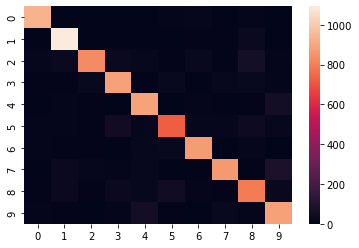

In [19]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

# build the classifier
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))

#### QDA

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# preprocess the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
trainX = trainX.astype('float')/255.0

testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])
testX = testX.astype('float')/255.0

# build the classifier
model = QuadraticDiscriminantAnalysis()

# fit the classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the training set
predictedY = model.predict(trainX)

# print quality metrics
print('\nTraining Classification Report:\n\n', classification_report(trainY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

print('\nTesting Confusion Matrix:\n')

sn.heatmap(confusion_matrix(testY, predictedY))

TypeError: QuadraticDiscriminantAnalysis.__init__() got an unexpected keyword argument 'njobs'

#### QDA with Regularization

In [ ]:
# collinearity warnings keep popping up, so we suppress them
import warnings
warnings.filterwarnings('ignore')

# that is a BAD idea in general, I suppressed ALL warnings, so
# only do this if you are very brave!

# import MNIST data
(trainX, trainY), (testX, testY) = mnist.load_data()

# reshape the data
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])

# normalize coordinates
trainX = trainX.astype('float')/255.0
testX = testX.astype('float')/255.0

# initialize accuracy and hyperparameter list
bestAccuracy = [0, 0]

# test regularization hyperparameters 0.00, 0.01, ..., 0.19
for i in range(20):
    rp = i/100
    
    # build the QDA classifier
    model = QuadraticDiscriminantAnalysis(reg_param = rp)

    # fit the QDA classifier to the training data
    model.fit(trainX, trainY)
    
    # find the mean cross-validation accuracy
    mean_cv_scores = np.mean(cross_val_score(model, trainX, trainY, cv = 5))

    # print quality metrics
    print('Mean CV accuracy for regularization parameter', rp, 'is', mean_cv_scores)
    
    # save the hyperparameter reg_param if better than found before
    if mean_cv_scores > bestAccuracy[0]:
        bestAccuracy = [mean_cv_scores, rp]
        
print('\nThe best dev accuracy', bestAccuracy[0], 'occured with', bestAccuracy[1], 'regularization parameter')
        
# build the QDA classifier
model = QuadraticDiscriminantAnalysis(reg_param = bestAccuracy[1])

# fit the QDA classifier to the training data
model.fit(trainX, trainY)

# predict the labels of the test set
predictedY = model.predict(testX)

# print quality metrics
print('\nTest Classification Report for', bestAccuracy[1], 'reg_param:\n\n', classification_report(testY, predictedY))

print('\nTest Confusion Matrix:\n')
sn.heatmap(confusion_matrix(testY, predictedY))

We now find 96% accuracy! This is easily the best result we have found for MNIST in the class so far.